In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Compare continuous and discrete model

In [2]:
R = 5
data = os.path.join('..', 'data')

## Compare Pareto sets

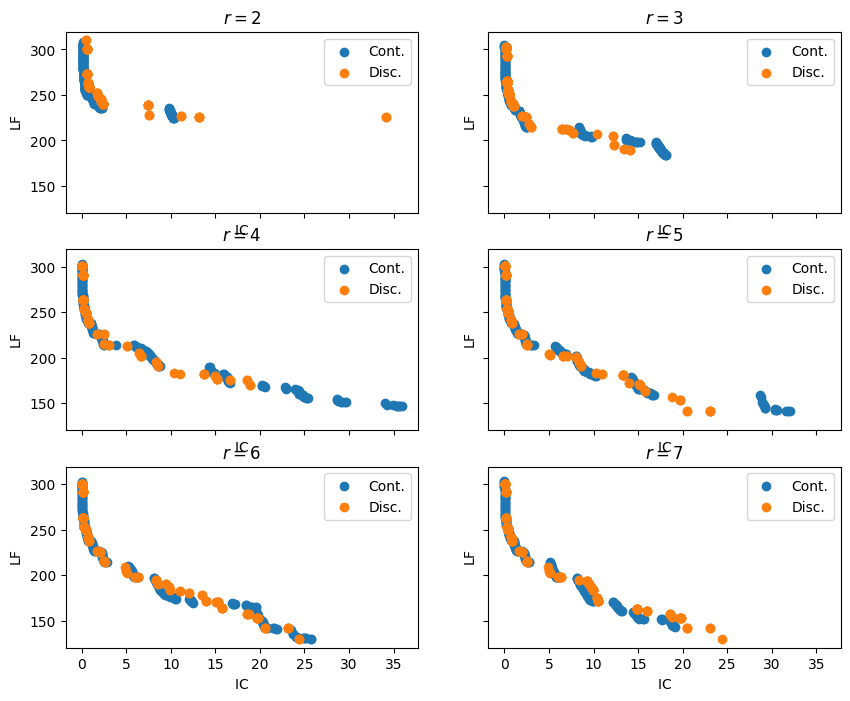

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(10, 8), sharex=True, sharey=True)

for i in range(3):
    for j in range(2):
        ax = axs[i, j]

        cont = pd.read_csv(os.path.join(data, f'continuous_r{2 + 2 * i + j}.csv'))
        ax.scatter(cont['IC'], cont['LF'])

        disc = pd.read_csv(os.path.join(data, f'discrete_r{2 + 2 * i + j}.csv'))
        ax.scatter(disc['IC'], disc['LF'])

        ax.set_title(f'$r={2 + 2 * i + j}$')
        ax.set_xlabel('$\mathsf{IC}$')
        ax.set_ylabel('$\mathsf{LF}$')
        ax.legend(['Cont.', 'Disc.'])

## Compare HV

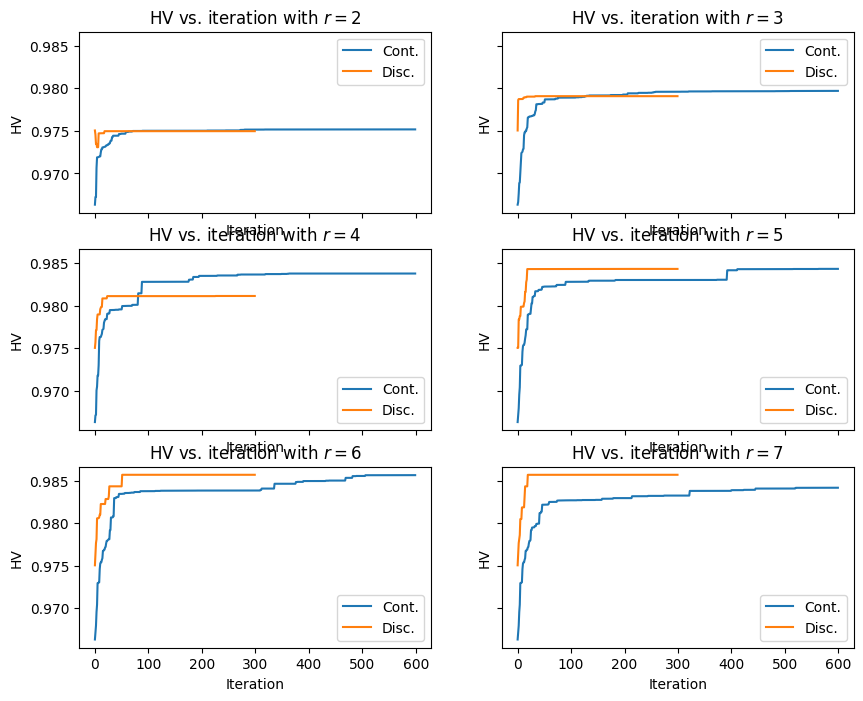

In [4]:

fig, axs = plt.subplots(3, 2, figsize=(10, 8), sharex=True, sharey=True)

for i in range(3):
    for j in range(2):
        ax = axs[i, j]

        cont = pd.read_csv(os.path.join(data, f'continuous_hv_r{2 + 2 * i + j}.csv'))
        ax.plot(cont['iter'], cont['HV'])

        disc = pd.read_csv(os.path.join(data, f'discrete_hv_r{2 + 2 * i + j}.csv'))
        ax.plot(disc['iter'], disc['HV'])

        ax.set_title(f'HV vs. iteration with $r={2 + 2 * i + j}$')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('HV')
        ax.legend(['Cont.', 'Disc.'])

[ 23.12625223 141.66      ]
[ 0.  0.  0.  0. -4.  0.  0.  0.  0.  0.]
[31.66823193336396, 28.841739274402652, 31.668231714467254, 31.668231829686864, 22.2085251858804, 28.842882732712116, 31.66823297689674, 28.798226015802353, 27.9282316290001, 28.488231145375185]


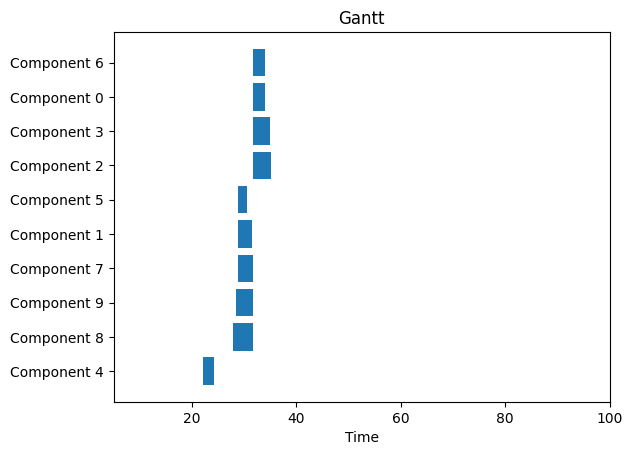

In [5]:
import dill
import numpy as np

from net_flow_opt.utils import structure, components
from net_flow_opt.model import Plan, Activity, System

system = System(structure=structure, components=components)

activities = [Activity(c) for c in components]

plan = Plan(activities=activities, system=system)

prob_type = [
    # 'continuous',
    'discrete'
]

for pt in prob_type:
    for r in range(5, 6):
        f_name = f'{pt}_r{r}'

        with open(os.path.join('..', 'data', f_name), 'rb') as f:
            res = dill.load(f)
        break
    break

# solution index
i = 0

if pt == 'discrete':
    gStr = np.zeros((plan.system.N, plan.system.N))
    gStr[np.arange(plan.system.N, dtype=int), res.opt[i].x - 1] = 1
    x = res.opt[i].x
    t = plan.compute_dates(gStr)
else:
    t = res.opt[i].get("X")
print(res.opt[i].get("F"))
print(res.opt[i].get("G"))
print(t)
fig = plan.plot_gantt_chart(t)

In [6]:
from net_flow_opt.model import ContinuousModel, DiscreteModel

r = 5

F = res.opt.get("F")
# print(np.argsort(F, axis=0))
i = 0
print(F[i])
print(res.opt.get("X")[i])

cont = ContinuousModel(system=system, resources=r)
disc = DiscreteModel(system=system, resources=r)

out = {}
disc._evaluate(res.opt.get("X")[i], out)
print(out)

t = np.copy(out["t"])
out = {}
cont._evaluate(t, out)
print(out)

[ 23.12625223 141.66      ]
[1 9 1 1 3 9 1 9 9 9]
{'t': array([31.82679506, 28.32679506, 31.82679506, 31.82679506, 22.20852513,
       28.32679506, 31.82679506, 28.32679506, 28.32679506, 28.32679506]), 'F': array([ 23.12625223, 141.66      ]), 'G': array([ 0,  0,  0,  0, -4,  0,  0,  0,  0,  0])}
{'F': array([ 23.12625223, 141.66      ]), 'G': array([ 0,  0,  0,  0, -4,  0,  0,  0,  0,  0])}


In [7]:
out = {}
res.algorithm.problem._evaluate(res.opt.get("X")[i], out)
print(out)

{'t': array([31.82679506, 28.32679506, 31.82679506, 31.82679506, 22.20852513,
       28.32679506, 31.82679506, 28.32679506, 28.32679506, 28.32679506]), 'F': array([ 23.12625223, 141.66      ]), 'G': array([ 0,  0,  0,  0, -4,  0,  0,  0,  0,  0])}
